# An Analysis of Oscar Awards and Film Data: Team 1


Oscar Award Data: https://www.kaggle.com/unanimad/the-oscar-award/kernels
Top 10 Highest Grossing Films: https://www.kaggle.com/bidyutchanda/top-10-highest-grossing-films-1975-2018



# Five questions we will explore:
1. What are the top 3 highest-grossing films that won an Oscar?
2. Which genre has won the most Oscars?
3. Which studio has the best Oscars to total movies produced ratio?
4. How is the relation between total nominations and Oscars award?
5. What is the award-winning rate per year?
6. How are genres represented among blockbuster movies? 


In [4]:
# load libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot
import numpy as np
import seaborn as sns

In [2]:
# setting the path for the csv files
path_blockbusters = "data/blockbusters.csv"
path_oscars = "data/the_oscar_award.csv"

# read the csv files
blockbusters = pd.read_csv(path_blockbusters)
oscars = pd.read_csv(path_oscars)

# Exploring the data

In [3]:
# getting an idea of how the blockbusters dataframe looks like
blockbusters.head(5)

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,"$700,059,566",2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"$678,815,482",2018
2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,"$608,581,744",2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"$416,769,345",2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,"$318,491,426",2018


In [4]:
# getting an idea of how the oscars dataframe looks like
oscars.head(5)

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


# Analysing the dataframes

## Differences
The data from the oscars starts from 1927.
The data from the blockbusters starts at 1975.
If we combine the data it makes sense to limit the oscar data to data >= 1975.

## Similarities
The dataframes have two columns in common:
1. The title of the film (title/film)
2. The year the film was produced (year/year_film)

In [5]:
# limit the oscar data to the year 1975 and up
oscars_1975 = oscars.loc[oscars["year_film"] >= 1975]

# Merging the data
We can merge the data on title and the year of the movie. To do this, we want to rename the columns so that they hold the same name

In [6]:
# Rename the column "title" to "film" in oscars_1975 and check that it worked
oscars_1975 = oscars_1975.rename(columns={"film": "title"})
oscars_1975.head(2)

,year_film,year_ceremony,ceremony,category,name,title,winner
5298,1975,1976,48,ACTOR,Walter Matthau,The Sunshine Boys,False
5299,1975,1976,48,ACTOR,Jack Nicholson,One Flew over the Cuckoo's Nest,True


In [7]:
# Rename the column "year" to "film" in blockbusters and check that it worked
blockbusters = blockbusters.rename(columns={"year": "year_film"})
blockbusters.head(2)

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year_film
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,"$700,059,566",2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"$678,815,482",2018


In [8]:
# Merge the files and check that it worked
oscars_and_busters = oscars_1975.merge(blockbusters, on = ['title', 'year_film'])
oscars_and_busters.head(2)

,year_film,year_ceremony,ceremony,category,name,title,winner,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,worldwide_gross
0,1975,1976,48,ACTOR,Al Pacino,Dog Day Afternoon,False,Drama,Crime,NaN,8.1,125,4,R,Warner Bros,"$50,000,000.00"
1,1975,1976,48,ACTOR IN A SUPPORTING ROLE,Chris Sarandon,Dog Day Afternoon,False,Drama,Crime,NaN,8.1,125,4,R,Warner Bros,"$50,000,000.00"


In [9]:
# check NaN 
oscars_and_busters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 842
Data columns (total 16 columns):
year_film          843 non-null int64
year_ceremony      843 non-null int64
ceremony           843 non-null int64
category           843 non-null object
name               843 non-null object
title              843 non-null object
winner             843 non-null bool
Main_Genre         843 non-null object
Genre_2            775 non-null object
Genre_3            505 non-null object
imdb_rating        843 non-null float64
length             843 non-null int64
rank_in_year       843 non-null int64
rating             843 non-null object
studio             843 non-null object
worldwide_gross    843 non-null object
dtypes: bool(1), float64(1), int64(5), object(9)
memory usage: 106.2+ KB


In [10]:
df = oscars_and_busters

In [181]:
df.sort_values('worldwide_gross')

,year_film,year_ceremony,ceremony,category,name,title,winner,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,worldwide_gross
775,2012,2013,85,PRODUCTION DESIGN,Production Design: Dan Hennah; Set Decoration:...,The Hobbit: An Unexpected Journey,False,Fantasy,Adventure,NaN,8.0,169,4,PG-13,Warner Bros,"$1,017,003,568.00"
776,2012,2013,85,VISUAL EFFECTS,"Joe Letteri, Eric Saindon, David Clayton and R...",The Hobbit: An Unexpected Journey,False,Fantasy,Adventure,NaN,8.0,169,4,PG-13,Warner Bros,"$1,017,003,568.00"
774,2012,2013,85,MAKEUP AND HAIRSTYLING,"Peter Swords King, Rick Findlater and Tami Lane",The Hobbit: An Unexpected Journey,False,Fantasy,Adventure,NaN,8.0,169,4,PG-13,Warner Bros,"$1,017,003,568.00"
754,2010,2011,83,VISUAL EFFECTS,"Ken Ralston, David Schaub, Carey Villegas and ...",Alice in Wonderland,False,Fantasy,Family,Adventure,6.5,108,2,PG,Walt Disney Pictures,"$1,025,467,110.00"
753,2010,2011,83,COSTUME DESIGN,Colleen Atwood,Alice in Wonderland,True,Fantasy,Family,Adventure,6.5,108,2,PG,Walt Disney Pictures,"$1,025,467,110.00"
752,2010,2011,83,ART DIRECTION,Production Design: Robert Stromberg; Set Decor...,Alice in Wonderland,True,Fantasy,Family,Adventure,6.5,108,2,PG,Walt Disney Pictures,"$1,025,467,110.00"
749,2010,2011,83,BEST PICTURE,"Darla K. Anderson, Producer",Toy Story 3,False,Comedy,Animation,Adventure,8.4,103,1,G,Walt Disney Pictures,"$1,063,171,911.00"
751,2010,2011,83,WRITING (Adapted Screenplay),Screenplay by Michael Arndt; Story by John Las...,Toy Story 3,False,Comedy,Animation,Adventure,8.4,103,1,G,Walt Disney Pictures,"$1,063,171,911.00"
750,2010,2011,83,SOUND EDITING,Tom Myers and Michael Silvers,Toy Story 3,False,Comedy,Animation,Adventure,8.4,103,1,G,Walt Disney Pictures,"$1,063,171,911.00"
748,2010,2011,83,MUSIC (Original Song),Music and Lyric by Randy Newman,Toy Story 3,True,Comedy,Animation,Adventure,8.4,103,1,G,Walt Disney Pictures,"$1,063,171,911.00"


In [11]:
# 1. What are the top 3 highest-grossing films that won an Oscar?
df1 = df.loc[df["winner"] == True]

In [12]:
df1.sort_values('worldwide_gross')

,year_film,year_ceremony,ceremony,category,name,title,winner,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,worldwide_gross
753,2010,2011,83,COSTUME DESIGN,Colleen Atwood,Alice in Wonderland,True,Fantasy,Family,Adventure,6.5,108,2,PG,Walt Disney Pictures,"$1,025,467,110.00"
752,2010,2011,83,ART DIRECTION,Production Design: Robert Stromberg; Set Decor...,Alice in Wonderland,True,Fantasy,Family,Adventure,6.5,108,2,PG,Walt Disney Pictures,"$1,025,467,110.00"
748,2010,2011,83,MUSIC (Original Song),Music and Lyric by Randy Newman,Toy Story 3,True,Comedy,Animation,Adventure,8.4,103,1,G,Walt Disney Pictures,"$1,063,171,911.00"
747,2010,2011,83,ANIMATED FEATURE FILM,Lee Unkrich,Toy Story 3,True,Comedy,Animation,Adventure,8.4,103,1,G,Walt Disney Pictures,"$1,063,171,911.00"
698,2006,2007,79,VISUAL EFFECTS,"John Knoll, Hal Hickel, Charles Gibson and All...",Pirates of the Caribbean: Dead Man's Chest,True,Fantasy,Adventure,Action,7.3,151,1,PG-13,Walt Disney Pictures,"$1,066,179,725.00"
771,2012,2013,85,MUSIC (Original Song),Music and Lyric by Adele Adkins and Paul Epworth,Skyfall,True,Thriller,Adventure,Action,7.8,143,2,PG-13,Metro-Goldwyn-Mayer,"$1,108,561,013.00"
772,2012,2013,85,SOUND EDITING,Per Hallberg and Karen Baker Landers,Skyfall,True,Thriller,Adventure,Action,7.8,143,2,PG-13,Metro-Goldwyn-Mayer,"$1,108,561,013.00"
654,2003,2004,76,DIRECTING,Peter Jackson,The Lord of the Rings: The Return of the King,True,Fantasy,Adventure,Western,8.9,201,1,PG-13,Warner Bros,"$1,119,929,521.00"
657,2003,2004,76,MUSIC (Original Score),Howard Shore,The Lord of the Rings: The Return of the King,True,Fantasy,Adventure,Western,8.9,201,1,PG-13,Warner Bros,"$1,119,929,521.00"
652,2003,2004,76,ART DIRECTION,Art Direction: Grant Major; Set Decoration: Da...,The Lord of the Rings: The Return of the King,True,Fantasy,Adventure,Western,8.9,201,1,PG-13,Warner Bros,"$1,119,929,521.00"


In [13]:
# top 3 movies - Alice in Wonderland, Toy Story 3, Pirates of the Caribbean

In [21]:
# 2. Which genre has earned the most Oscars?
genre = df1.groupby(['title'], sort=False, as_index=False)['Main_Genre'].first()

In [22]:
genre.head()

,title,Main_Genre
0,Dog Day Afternoon,Drama
1,Shampoo,Romance
2,Rocky,Sport
3,All the President's Men,Thriller
4,King Kong,Horror


In [97]:
genre['Main_Genre'].value_counts()

Romance      21
Sci-Fi       12
Drama        12
Fantasy      10
Thriller      9
Comedy        9
Animation     7
Action        5
War           5
Adventure     4
Sport         3
Music         2
History       2
Crime         2
Family        1
Horror        1
Name: Main_Genre, dtype: int64

In [99]:
genre['Main_Genre'].value_counts()

Romance      21
Sci-Fi       12
Drama        12
Fantasy      10
Thriller      9
Comedy        9
Animation     7
Action        5
War           5
Adventure     4
Sport         3
Music         2
History       2
Crime         2
Family        1
Horror        1
Name: Main_Genre, dtype: int64

In [102]:
import plotly.express as px

# convert our series to a df
data_plot = genre['Main_Genre'].value_counts().rename_axis('Main_Genre').reset_index(name='oscars')
fig = px.bar(data_plot, x='Main_Genre', y='oscars')
fig.show()

In [43]:
# 3. Which studio has the best Oscars to total movies produced ratio?
# find number of movies won by studio, total movies, and merge on studio. Divide movies won by total movies
winners = df1.groupby(['title'], sort=False, as_index=False)['studio'].first()

In [50]:
winners['studio'].value_counts()

Warner Bros             19
Walt Disney Pictures    16
Paramount Pictures      15
Universal Pictures      11
20th Century Fox         9
Metro-Goldwyn-Mayer      9
Columbia Pictures        8
Pixar                    7
Sony Pictures            6
DreamWorks               4
Lionsgate Films          1
Name: studio, dtype: int64

In [76]:
# convert to dataframe
winners1 = winners['studio'].value_counts().rename_axis('studio').reset_index(name='oscars')

In [77]:
winners1.head()

,studio,oscars
0,Warner Bros,19
1,Walt Disney Pictures,16
2,Paramount Pictures,15
3,Universal Pictures,11
4,20th Century Fox,9


In [67]:
total = df.groupby(['title'], sort=False, as_index=False)['studio'].first()

In [69]:
total['studio'].value_counts()

Warner Bros             50
Walt Disney Pictures    40
Paramount Pictures      35
Universal Pictures      23
20th Century Fox        21
Columbia Pictures       18
Metro-Goldwyn-Mayer     17
Sony Pictures           12
Pixar                    9
DreamWorks               8
IFC Films                1
Newmarket Films          1
Lionsgate Films          1
Name: studio, dtype: int64

In [72]:
# convert to dataframe
total1 = total['studio'].value_counts().rename_axis('studio').reset_index(name='total_movies')

In [73]:
total1.head()

,studio,total_movies
0,Warner Bros,50
1,Walt Disney Pictures,40
2,Paramount Pictures,35
3,Universal Pictures,23
4,20th Century Fox,21


In [78]:
merged = winners1.merge(total1, on = ['studio'])

In [79]:
merged.head()

,studio,oscars,total_movies
0,Warner Bros,19,50
1,Walt Disney Pictures,16,40
2,Paramount Pictures,15,35
3,Universal Pictures,11,23
4,20th Century Fox,9,21


In [80]:
merged['ratio_oscars'] = merged['oscars']/merged['total_movies']

In [85]:
merged.sort_values('ratio_oscars', ascending=False)

,studio,oscars,total_movies,ratio_oscars
10,Lionsgate Films,1,1,1.000000
7,Pixar,7,9,0.777778
5,Metro-Goldwyn-Mayer,9,17,0.529412
8,Sony Pictures,6,12,0.500000
9,DreamWorks,4,8,0.500000
3,Universal Pictures,11,23,0.478261
6,Columbia Pictures,8,18,0.444444
2,Paramount Pictures,15,35,0.428571
4,20th Century Fox,9,21,0.428571
1,Walt Disney Pictures,16,40,0.400000


In [ ]:
# Although Warner Bros makes the largest total movies, it's oscar winning ratio is the lowest.
# Pixer has a favouritable ratio at 78%.

In [90]:
import plotly.graph_objects as go

x = merged['studio']

In [105]:
fig = go.Figure(data=[
    go.Bar(name='winners', x=x, y=merged['oscars']),
    go.Bar(name='total', x=x, y=merged['total_movies'])
           ])
# Change the bar mode
fig.update_layout(barmode='group', title='Nominated movies grouped by studio')
fig.show()

In [106]:
# 4. Plot number of nominations over the years and oscars
df.head()

,year_film,year_ceremony,ceremony,category,name,title,winner,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,worldwide_gross
0,1975,1976,48,ACTOR,Al Pacino,Dog Day Afternoon,False,Drama,Crime,NaN,8.1,125,4,R,Warner Bros,"$50,000,000.00"
1,1975,1976,48,ACTOR IN A SUPPORTING ROLE,Chris Sarandon,Dog Day Afternoon,False,Drama,Crime,NaN,8.1,125,4,R,Warner Bros,"$50,000,000.00"
2,1975,1976,48,DIRECTING,Sidney Lumet,Dog Day Afternoon,False,Drama,Crime,NaN,8.1,125,4,R,Warner Bros,"$50,000,000.00"
3,1975,1976,48,FILM EDITING,Dede Allen,Dog Day Afternoon,False,Drama,Crime,NaN,8.1,125,4,R,Warner Bros,"$50,000,000.00"
4,1975,1976,48,BEST PICTURE,"Martin Bregman and Martin Elfand, Producers",Dog Day Afternoon,False,Drama,Crime,NaN,8.1,125,4,R,Warner Bros,"$50,000,000.00"


In [129]:
years_total = df['year_film'].value_counts().rename_axis('year').reset_index(name='nominations')
# years_total.head()

In [173]:
years_oscar = df1['year_film'].value_counts().rename_axis('year').reset_index(name='oscars')
# years_oscar.head()

In [174]:
merged_years = years_total.merge(years_oscar, on = ['year']).sort_values('year', ascending=True)
merged_years.head()

,year,nominations,oscars
29,1975,16,2
6,1976,28,10
1,1977,36,13
13,1978,24,7
11,1979,25,8


In [180]:
x = merged_years['year']
fig = go.Figure(data=[
    go.Scatter(name='winners', x=x, y=merged_years['oscars']),
    go.Scatter(name='total', x=x, y=merged_years['nominations'])
           ])
# Change the bar mode
fig.update_layout(barmode='group',title='Nominated movies grouped by studio', xaxis_title='year',
                  yaxis_title='nominatated movies')
fig.show()

In [182]:
# decline in overall movies being nominated and therefore decline in winners selected

In [189]:
# 5. Winning probability year to year
merged_years['winning_prob'] = merged_years['oscars']/merged_years['nominations']
fig = px.line(merged_years, x='year', y='winning_prob')
fig.show()

In [ ]:
# there is a better chance of winning an oscar if you are nominated

**Question 6: What movie genre is most often present in blobkbuster shortlist?**

To answer this question, we visualise the count of each genre over the entire blockbuster dataset. 

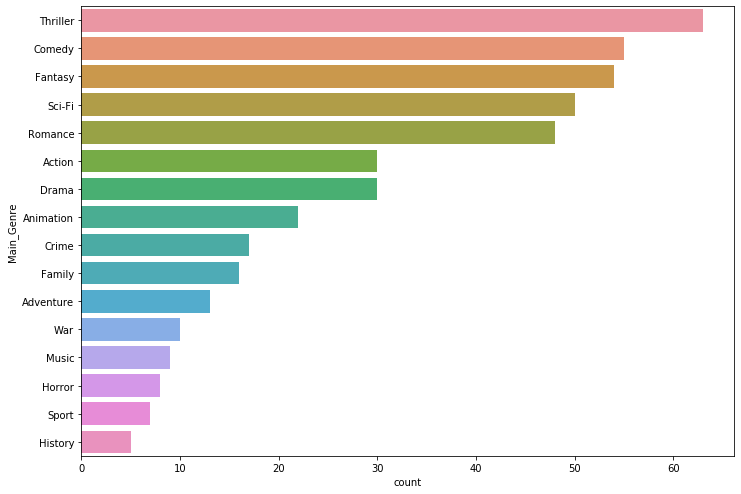

In [12]:
# visualise the genre most frequently present in blobkbuster shortlist

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

ax = sns.countplot(y="Main_Genre", data=blockbusters, order = blockbusters['Main_Genre'].value_counts().index)

Thriller seems to be the most common genre. However may that have varied over time? To verify this we visualise the proportion represented by each genre from the total of each specific year.

In [13]:
# compute count of movies across and within categories each year, to obtain proportion represented by each category

categories_each_year = (blockbusters
   .assign(number_year = lambda df: df.groupby('year')['title'].transform(len))
   .assign(number_year_category = lambda df: df.groupby(['year', 'Main_Genre'])['title'].transform(len))
   .assign(category_per_year = lambda df: df['number_year_category'] / df['number_year'])
)

categories_each_year = categories_each_year[['Main_Genre', 'year','category_per_year']].drop_duplicates() 

categories_each_year = (categories_each_year
     .assign(temp=lambda df: df.groupby('year')['category_per_year'].shift())
     .fillna(0)
     .assign(bottom=lambda df: df.groupby('year')['temp'].cumsum()) #used for plotting
     .reset_index() 
     .drop(['temp', 'index'], axis=1)
)


# create a dataframe of all combinations of year and genre, with counts of genre (filled in with 0 if not in the blockbuster shortlist)

import itertools
a = blockbusters.year.unique()
b = blockbusters.Main_Genre.unique()
#c = [-1]
# result contains all possible combinations.
combinations = list(itertools.product(a,b))
combinations = pd.DataFrame.from_dict(combinations).rename(columns={0: "year", 1: "Main_Genre"}).assign(category_per_year=float(0),bottom=float(0))

categories_each_year_full = (combinations
                             .merge(categories_each_year, on = ['year','Main_Genre'], how='outer')
                             .fillna(0)
                             .drop(['category_per_year_x','bottom_x'], axis=1)
                             .sort_values(['year', 'Main_Genre'])
                            )

#create color mapping  

colors = ['chartreuse', 'olivedrab', 'darkseagreen', 'forestgreen','lightslategrey', 'darkturquoise', 'paleturquoise', 'cyan', 'cadetblue', 'lightblue', 'deepskyblue', 'darkmagenta', 'plum', 'cornflowerblue', 'midnightblue', 'blue']
color_map = {'Genre': categories_each_year_full.Main_Genre.unique(),
        'Color': colors}
color_map = pd.DataFrame(color_map, columns = ['Genre', 'Color'])

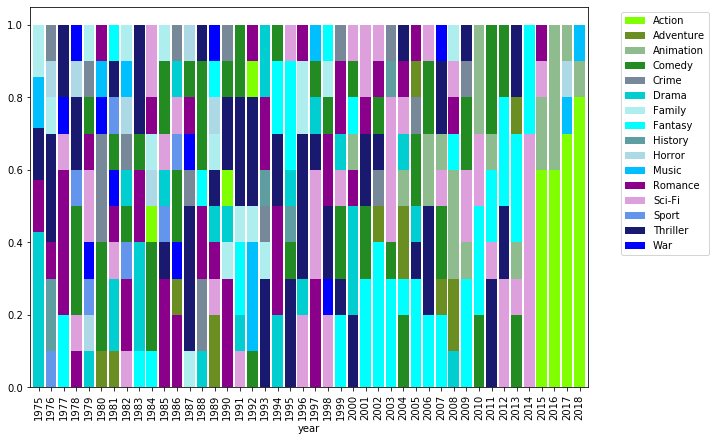

In [14]:
# visualise the proportions in a 100% stacked bar chart

fig, ax = pyplot.subplots()




for num, genre in enumerate(categories_each_year_full.Main_Genre.unique()):
    values = list(categories_each_year_full[categories_each_year_full['Main_Genre'] == genre].loc[:, 'category_per_year_y'])
    margin_bottom = list(categories_each_year_full[categories_each_year_full['Main_Genre'] == genre].loc[:, 'bottom_y'])
    categories_each_year_full[categories_each_year_full['Main_Genre'] == genre].plot.bar(x='year',y='category_per_year_y', ax=ax, stacked=True, 
                                   bottom = margin_bottom, label=genre, color=color_map[color_map['Genre'] == genre].loc[:, 'Color'], figsize=(10,7), width = 0.85)


pyplot.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

pyplot.show()



Although thriller was the main category overall, action movies seem to have been most popular lately. 

**Question 7: What movie genre brings the most revenue among blockbuster movies?**

Here again we'll compute revenue of movies across and within categories each year, to obtain proportion represented by each category

In [15]:
# the revenue variable is a string - we clean it and convert it to numeric

blockbusters['worldwide_gross'] = blockbusters['worldwide_gross'].str.replace(',', '')
blockbusters['worldwide_gross'] = blockbusters['worldwide_gross'].str.replace('$', '')
blockbusters['worldwide_gross'] = pd.to_numeric(blockbusters['worldwide_gross'])

AttributeError: Can only use .str accessor with string values!

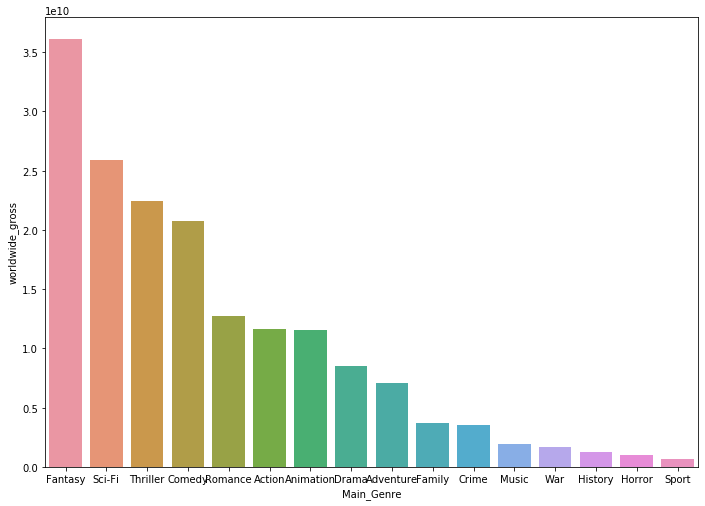

In [16]:
# visualise the revenue of each genre

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

ax = sns.barplot(x="Main_Genre", y='worldwide_gross', data=blockbusters, estimator=sum, ci=None, order=blockbusters.groupby('Main_Genre')['worldwide_gross'].sum().sort_values(ascending=False).index)


Fantasy seems to be the highest grossing genre. Thriller still comes third. We can now check again whether this varies by year. 

In [17]:
revenue_each_year = (blockbusters
                     .assign(worldwide_gross = pd.to_numeric(blockbusters['worldwide_gross']))
                     .assign(revenue_year = lambda df: df.groupby('year')['worldwide_gross'].transform(sum))
                     .assign(revenue_year_category = lambda df: df.groupby(['year', 'Main_Genre'])['worldwide_gross'].transform(sum))
                     .assign(prop_revenue_per_category_year = lambda df: df['revenue_year_category'] / df['revenue_year'])
                    )

revenue_each_year.head()


revenue_each_year = revenue_each_year[['Main_Genre', 'year','prop_revenue_per_category_year']].drop_duplicates() 

revenue_each_year = (revenue_each_year
     .assign(temp=lambda df: df.groupby('year')['prop_revenue_per_category_year'].shift())
     .fillna(0)
     .assign(bottom=lambda df: df.groupby('year')['temp'].cumsum()) #used for plotting
     .reset_index() 
     .drop(['temp', 'index'], axis=1)
)

revenue_each_year_full = (combinations
                     .rename({"category_per_year": "prop_revenue_per_category_year"}, axis="columns")
                             .merge(revenue_each_year, on = ['year','Main_Genre'], how='outer')
                             .fillna(0)
                             .drop(['prop_revenue_per_category_year_x','bottom_x'], axis=1)
                             .sort_values(['year', 'Main_Genre'])
                            )



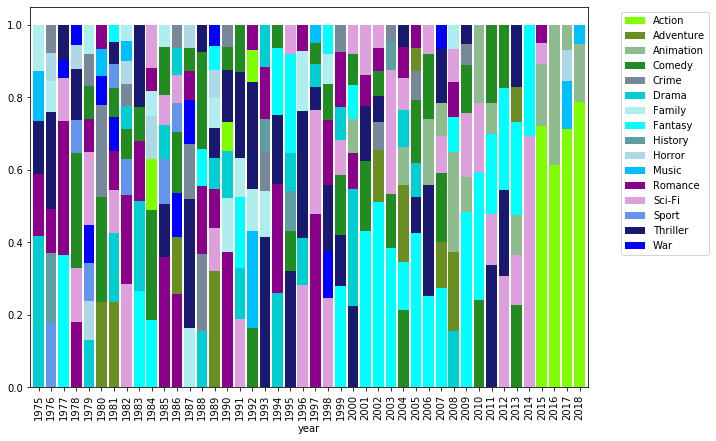

In [18]:
# visualise proportions

fig, ax = pyplot.subplots()

for num, genre in enumerate(revenue_each_year_full.Main_Genre.unique()):
    values = list(revenue_each_year_full[categories_each_year_full['Main_Genre'] == genre].loc[:, 'prop_revenue_per_category_year_y'])
    margin_bottom = list(revenue_each_year_full[categories_each_year_full['Main_Genre'] == genre].loc[:, 'bottom_y'])
    revenue_each_year_full[revenue_each_year_full['Main_Genre'] == genre].plot.bar(x='year',y='prop_revenue_per_category_year_y', ax=ax, stacked=True, 
                                   bottom = margin_bottom, label=genre, color=color_map[color_map['Genre'] == genre].loc[:, 'Color'], figsize=(10,7), width = 0.85)


pyplot.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

pyplot.show()
# here again action movies are seen to become more proeminent in recent years. 